**Import Libraries & ML Models**

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

**Load Dataset**

In [42]:
df = pd.read_csv("salary_data.csv")

**Data Cleaning**

In [43]:
df.fillna(df.mode().iloc[0], inplace=True)  # Fill missing with mode

**Encode Categorical Variables**

In [44]:
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


**Remove Outliers (IQR method)**

In [57]:
# Remove outliers from Salary too
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df["Salary"] >= lower) & (df["Salary"] <= upper)]


In [45]:
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Salary")
df = remove_outliers(df, numerical_cols)

**Create Salary Class (Low/Medium/High)**

In [46]:
df["Salary_Class"] = pd.qcut(df["Salary"], q=3, labels=["Low", "Medium", "High"])

# 7. Prepare Features & Target
X_reg = df.drop(["Salary", "Salary_Class"], axis=1)
y_reg = df["Salary"]

X_cls = X_reg.copy()
y_cls = LabelEncoder().fit_transform(df["Salary_Class"])

**Prepare Features & Target**

In [47]:
X_reg = df.drop(["Salary", "Salary_Class"], axis=1)
y_reg = df["Salary"]

X_cls = X_reg.copy()
y_cls = LabelEncoder().fit_transform(df["Salary_Class"])

**Scale Features**

In [48]:
scaler = RobustScaler()
X_scaled_reg = scaler.fit_transform(X_reg)
X_scaled_cls = scaler.transform(X_cls)

**Train/Test Split**

In [49]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled_reg, y_reg, test_size=0.3, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled_cls, y_cls, test_size=0.3, random_state=42)

**Cross-Validation**

In [59]:
scores = cross_val_score(model, X_scaled_reg, y_reg, cv=5, scoring='r2')
print(f"R² CV Mean: {scores.mean():.4f}")

R² CV Mean: 0.7754


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


**Define Models**

In [50]:
regressors = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "SVR": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "KNN Regressor": KNeighborsRegressor()
}

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

**Train & Evaluate Regressors**

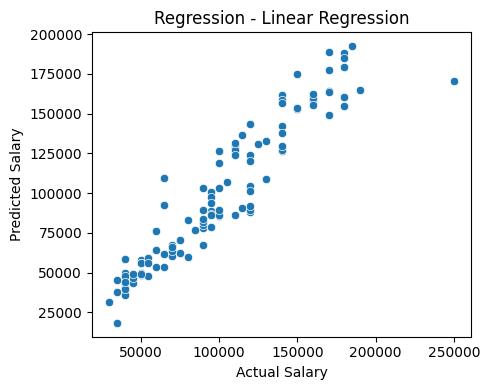

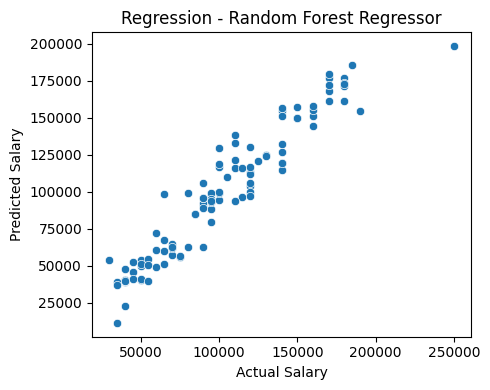

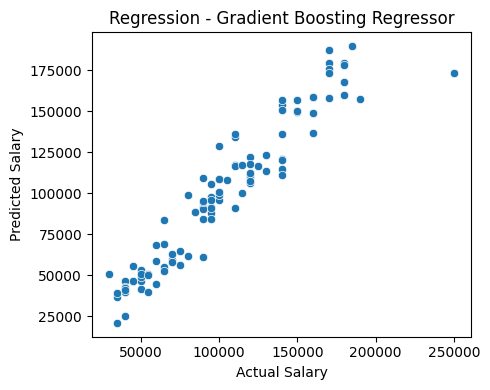

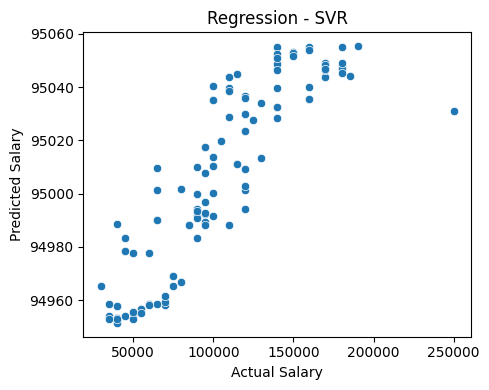

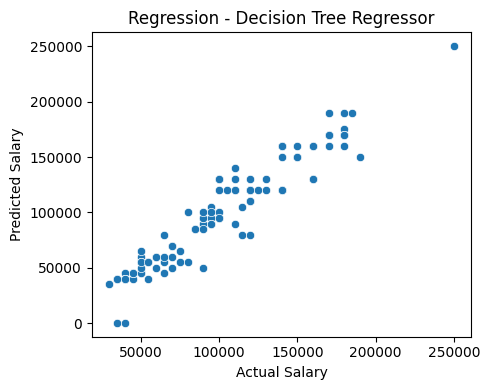

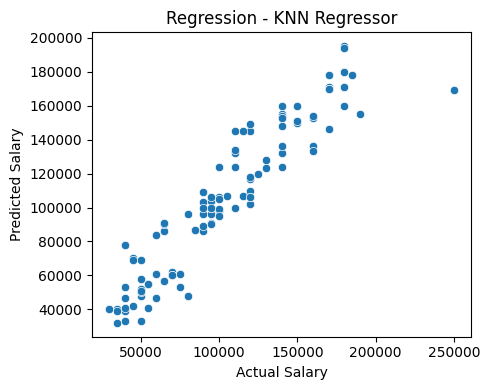


🔷 Regression Results
                         Model           MAE           MSE          RMSE  \
1      Random Forest Regressor   9262.358407  1.719134e+08  13111.576045   
2  Gradient Boosting Regressor   9439.954144  1.900375e+08  13785.409874   
4      Decision Tree Regressor   9728.318584  2.105995e+08  14512.047177   
0            Linear Regression  10891.312678  2.392107e+08  15466.436729   
5                KNN Regressor  11095.486726  2.543030e+08  15946.879380   
3                          SVR  38111.391126  2.176625e+09  46654.314669   

   R2 Score  
1  0.920550  
2  0.912174  
4  0.902671  
0  0.889448  
5  0.882473  
3 -0.005933  


In [51]:
regression_results = []
for name, model in regressors.items():
    model.fit(X_train_r, y_train_r)
    y_pred = model.predict(X_test_r)

    regression_results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test_r, y_pred),
        "MSE": mean_squared_error(y_test_r, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test_r, y_pred)),
        "R2 Score": r2_score(y_test_r, y_pred)
    })

    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=y_test_r, y=y_pred)
    plt.xlabel("Actual Salary")
    plt.ylabel("Predicted Salary")
    plt.title(f"Regression - {name}")
    plt.tight_layout()
    plt.show()

regression_df = pd.DataFrame(regression_results).sort_values(by="R2 Score", ascending=False)
print("\n🔷 Regression Results")
print(regression_df)


**Compare Regression Model**

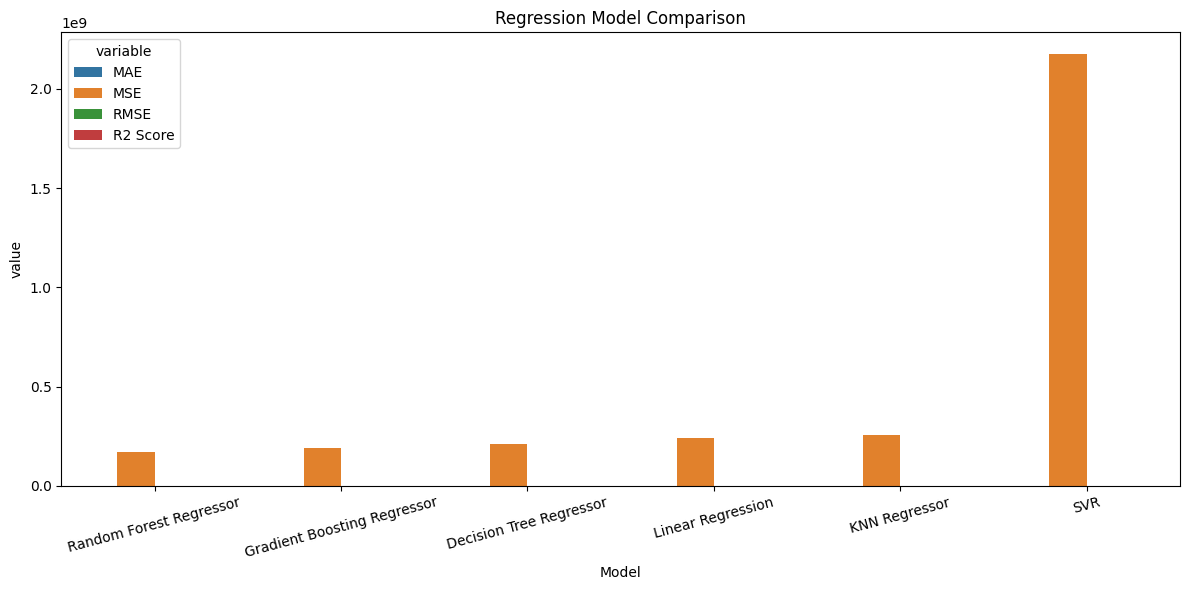

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(data=regression_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Regression Model Comparison")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


**Train & Evaluate Classifiers**

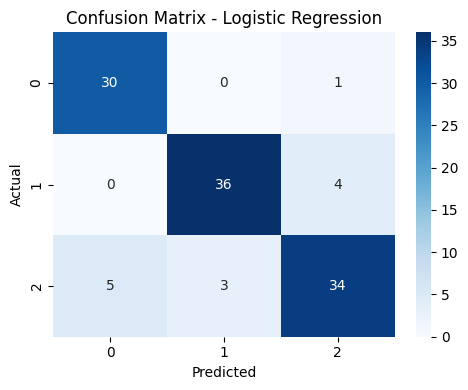

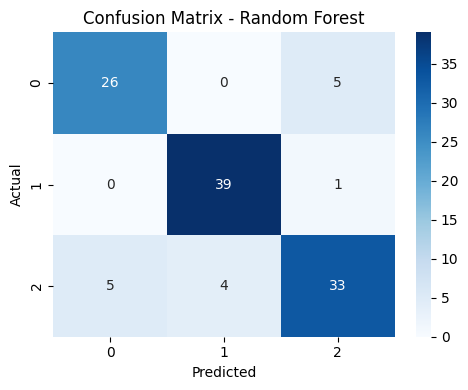

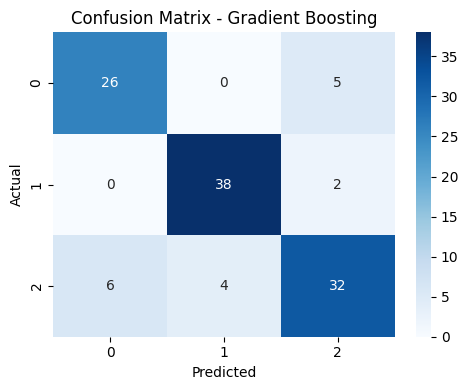

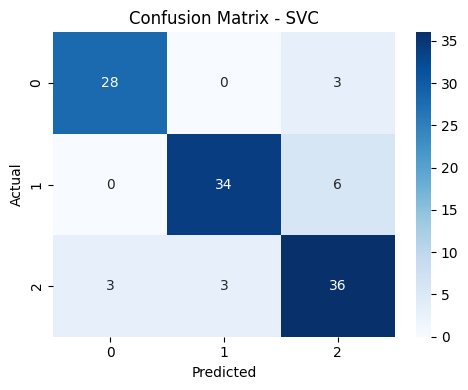

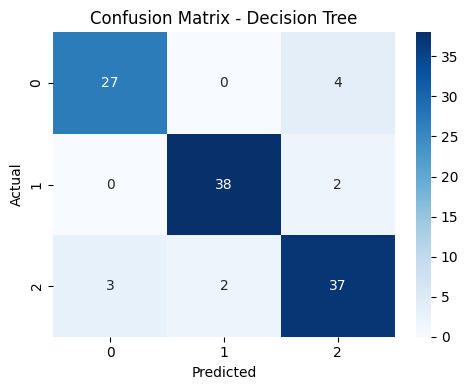

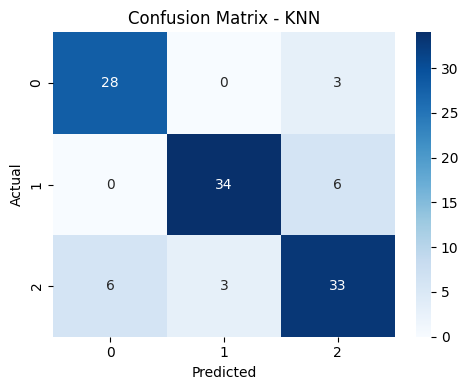

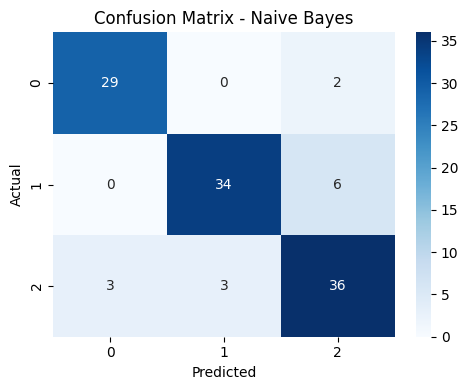


🔷 Classification Results
                 Model  Accuracy  Precision    Recall  F1 Score  \
4        Decision Tree  0.902655   0.903005  0.902655  0.902720   
0  Logistic Regression  0.884956   0.885928  0.884956  0.884042   
6          Naive Bayes  0.876106   0.878001  0.876106  0.876346   
3                  SVC  0.867257   0.870414  0.867257  0.867994   
1        Random Forest  0.867257   0.865642  0.867257  0.865598   
2    Gradient Boosting  0.849558   0.848137  0.849558  0.848192   
5                  KNN  0.840708   0.843240  0.840708  0.840994   

   Confidence Score  
4          1.000000  
0          0.821289  
6          0.950548  
3          0.880702  
1          0.903097  
2          0.950273  
5          0.913274  


In [63]:
classification_results = []
for name, model in classifiers.items():
    model.fit(X_train_c, y_train_c)
    y_pred = model.predict(X_test_c)

    if hasattr(model, "predict_proba"):
        confidence = np.mean(np.max(model.predict_proba(X_test_c), axis=1))
    else:
        confidence = np.mean(np.abs(model.decision_function(X_test_c)))

    classification_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test_c, y_pred),
        "Precision": precision_score(y_test_c, y_pred, average='weighted'),
        "Recall": recall_score(y_test_c, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test_c, y_pred, average='weighted'),
        "Confidence Score": confidence
    })

    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test_c, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

classification_df = pd.DataFrame(classification_results).sort_values(by="Accuracy", ascending=False)
print("\n🔷 Classification Results")
print(classification_df)

**Plot Accuracy only**

/tmp/ipython-input-62-621446677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=classification_df.sort_values("Accuracy", ascending=False), x="Model", y="Accuracy", palette="viridis")


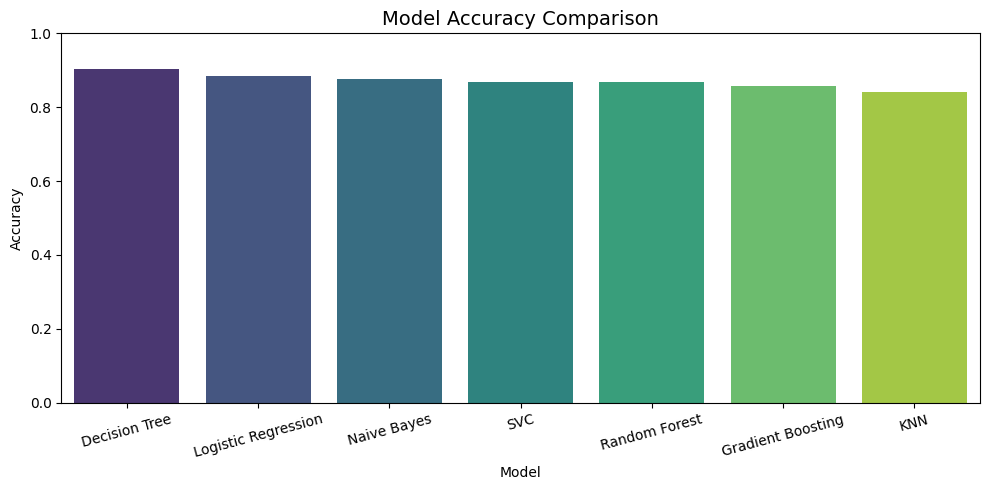

In [62]:
plt.figure(figsize=(10, 5))
sns.barplot(data=classification_df.sort_values("Accuracy", ascending=False), x="Model", y="Accuracy", palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.ylim(0, 1)  # Because accuracy is between 0 and 1
plt.tight_layout()
plt.show()

**Compare Classification Model**

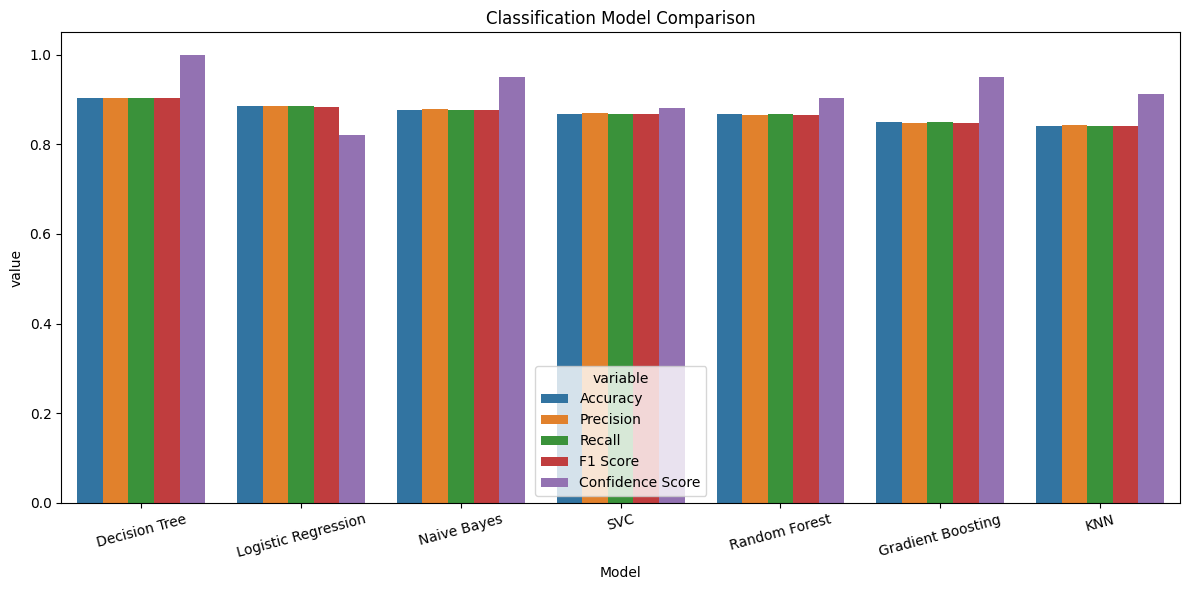

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(data=classification_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Classification Model Comparison")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

**Save Best Models**

In [53]:
best_reg_model_name = regression_df.iloc[0]["Model"]
best_cls_model_name = classification_df.iloc[0]["Model"]

best_reg_model = regressors[best_reg_model_name]
best_cls_model = classifiers[best_cls_model_name]

with open("best_regressor.pkl", "wb") as f:
    pickle.dump(best_reg_model, f)

with open("best_classifier.pkl", "wb") as f:
    pickle.dump(best_cls_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

print(f"\n✅ Best Regressor Saved: {best_reg_model_name}")
print(f"✅ Best Classifier Saved: {best_cls_model_name}")


✅ Best Regressor Saved: Random Forest Regressor
✅ Best Classifier Saved: Logistic Regression


**Sample Prediction with Sample input**

In [56]:
sample = {
    "Age": 30,
    "Gender": "Female",
    "Education Level": "Bachelor's",
    "Job Title": "Data Analyst",
    "Years of Experience": 5
}

input_df = pd.DataFrame([sample])
for col in input_df.select_dtypes(include='object').columns:
    if col in label_encoders:
        input_df[col] = label_encoders[col].transform(input_df[col])
    else:
        raise ValueError(f"Missing encoder for column: {col}")

input_scaled = scaler.transform(input_df)

# Predict salary (regression)
predicted_salary = best_reg_model.predict(input_scaled)[0]

# Predict salary class (classification)
salary_class_encoder = LabelEncoder()
salary_class_encoder.classes_ = np.array(["Low", "Medium", "High"])
class_prediction = best_cls_model.predict(input_scaled)[0]
predicted_class = salary_class_encoder.inverse_transform([class_prediction])[0]

print("\n📈 Predicted Salary (Regression): ${:,.2f}".format(predicted_salary))
print("🏷️ Predicted Salary Class (Low / Medium / High) (Classification):", predicted_class)


📈 Predicted Salary (Regression): $47,350.00
🏷️ Predicted Salary Class (Low / Medium / High) (Classification): Medium
